In [10]:
import pandas as pd
import matplotlib.pyplot as plt

rawData = pd.read_csv('data/data.scv', sep='\t')
rawData.time = pd.to_datetime(rawData.time)
rawData = rawData.set_index(rawData.time)
rawData = rawData.drop(['time','wDir.50','wDir.850hpa'],axis=1)
rawData.head()

psfc       msl  wSpeed.50  wSpeed.850hpa  \
time                                                                
1990-01-01 00:00:00  100222.2  101272.5      11.27          18.02   
1990-01-01 01:00:00  100068.3  101118.8      11.65          19.68   
1990-01-01 02:00:00   99929.3  100975.7      12.53          20.97   
1990-01-01 03:00:00   99843.4  100890.6      12.16          21.43   
1990-01-01 04:00:00   99813.9  100869.8      11.81          20.91   

                     temperature.10  temperature.50  dispHeight  precIceWater  \
time                                                                            
1990-01-01 00:00:00          -10.63          -11.43         0.1           0.0   
1990-01-01 01:00:00           -9.37          -10.21         0.1           0.0   
1990-01-01 02:00:00           -7.51           -8.43         0.1           0.0   
1990-01-01 03:00:00           -6.51           -7.41         0.1           0.1   
1990-01-01 04:00:00           -6.38           -7.23         0.1           0.9   

                     precLiqWater  precWaterVapor  specHumidity.10  
time                                                                
1990-01-01 00:00:00           1.3          6212.4              1.4  
1990-01-01 01:00:00           0.3          6500.8              1.5  
1990-01-01 02:00:00           0.0          5970.2              1.7  
1990-01-01 03:00:00           0.0          5753.2              1.9  
1990-01-01 04:00:00           6.1          6736.5              1.9

In [11]:
from sklearn import preprocessing
import numpy as np

data = rawData[:3000]
scaler = preprocessing.MinMaxScaler().fit(X=np.array(data))
DataScaler = scaler.transform(np.array(data))
df = pd.DataFrame(DataScaler, columns=data.columns)

df.head()

psfc       msl  wSpeed.50  wSpeed.850hpa  temperature.10  \
0  0.476500  0.474704   0.558943       0.581434        0.462721   
1  0.449649  0.448237   0.578252       0.637064        0.486625   
2  0.425399  0.423595   0.622967       0.680295        0.521912   
3  0.410412  0.408941   0.604167       0.695710        0.540884   
4  0.405265  0.405359   0.586382       0.678284        0.543350   

   temperature.50  dispHeight  precIceWater  precLiqWater  precWaterVapor  \
0        0.455059         0.5      0.000000      0.004017        0.224019   
1        0.478048         0.5      0.000000      0.000927        0.235905   
2        0.511588         0.5      0.000000      0.000000        0.214038   
3        0.530808         0.5      0.000489      0.000000        0.205095   
4        0.534200         0.5      0.004401      0.018850        0.245618   

   specHumidity.10  
0         0.152941  
1         0.164706  
2         0.188235  
3         0.211765  
4         0.211765

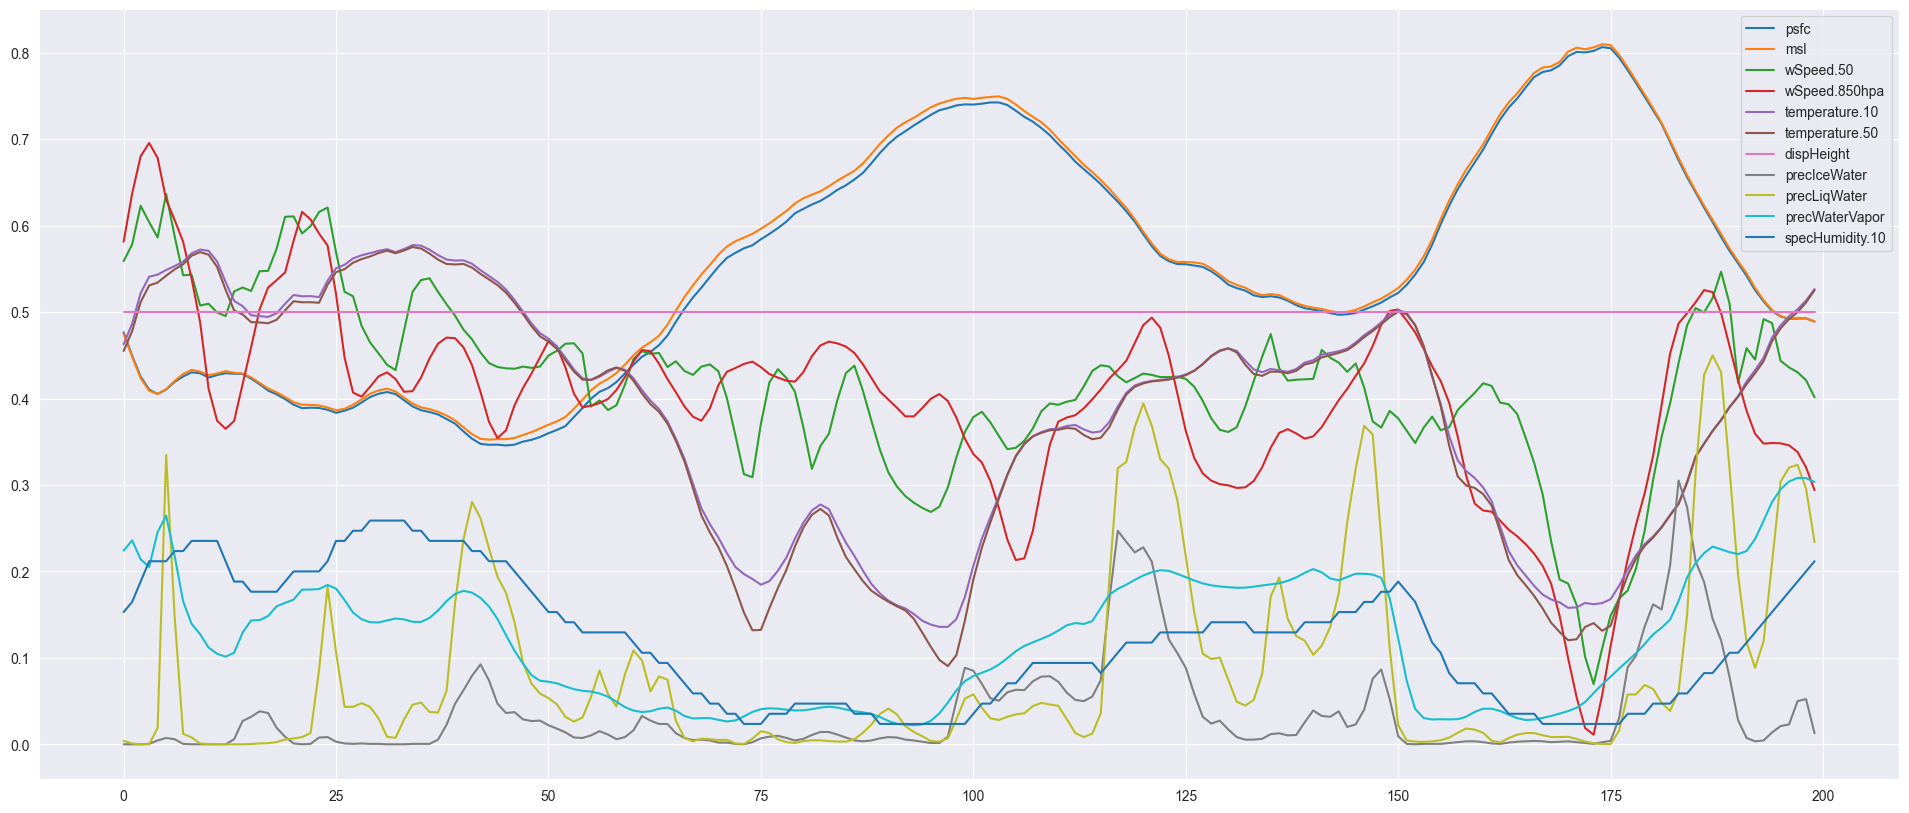

In [12]:
f, ax = plt.subplots()
f.set_size_inches(24,10)
DataLines = 200

for column in df.columns:
    ax.plot(df[column][:DataLines:], label = column)
ax.legend()

In [13]:
corr = np.corrcoef(rawData['temperature.10'].values, rawData['specHumidity.10'].values)[0,1]
corr

0.9062583857170985

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
from scalecast.MVForecaster import MVForecaster
from scalecast.multiseries import export_model_summaries
from scalecast import GridGenerator

In [15]:
models = ('mlr','elasticnet','knn','rf','gbt','xgboost','mlp')
GridGenerator.get_example_grids()
GridGenerator.get_mv_grids()

In [19]:
df

psfc       msl  wSpeed.50  wSpeed.850hpa  temperature.10  \
0     0.476500  0.474704   0.558943       0.581434        0.462721   
1     0.449649  0.448237   0.578252       0.637064        0.486625   
2     0.425399  0.423595   0.622967       0.680295        0.521912   
3     0.410412  0.408941   0.604167       0.695710        0.540884   
4     0.405265  0.405359   0.586382       0.678284        0.543350   
...        ...       ...        ...            ...             ...   
2995  0.378136  0.372589   0.460874       0.440684        0.852210   
2996  0.367808  0.362481   0.476626       0.440013        0.844052   
2997  0.362277  0.356712   0.469004       0.408512        0.836084   
2998  0.360253  0.354784   0.452236       0.371314        0.828306   
2999  0.359381  0.353337   0.430894       0.349196        0.819389   

      temperature.50  dispHeight  precIceWater  precLiqWater  precWaterVapor  \
0           0.455059         0.5      0.000000      0.004017        0.224019   
1           0.478048         0.5      0.000000      0.000927        0.235905   
2           0.511588         0.5      0.000000      0.000000        0.214038   
3           0.530808         0.5      0.000489      0.000000        0.205095   
4           0.534200         0.5      0.004401      0.018850        0.245618   
...              ...         ...           ...           ...             ...   
2995        0.843980         1.0      0.006846      0.223424        0.625094   
2996        0.837950         1.0      0.002445      0.203646        0.613193   
2997        0.831543         1.0      0.001956      0.156057        0.569744   
2998        0.824383         1.0      0.000978      0.081891        0.529983   
2999        0.815527         1.0      0.000978      0.051298        0.522586   

      specHumidity.10  
0            0.152941  
1            0.164706  
2            0.188235  
3            0.211765  
4            0.211765  
...               ...  
2995         0.600000  
2996         0.635294  
2997         0.658824  
2998         0.682353  
2999         0.705882  

[3000 rows x 11 columns]

In [20]:
forecasters = {}

for column in df.columns:
    forecasters[column] = Forecaster(y=df[column],current_dates = data.index)
print(forecasters)



{'psfc': Forecaster(
    DateStartActuals=1990-01-01T00:00:00.000000000
    DateEndActuals=1990-05-05T23:00:00.000000000
    Freq=H
    N_actuals=3000
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=0
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=None
    GridsFile=Grids
), 'msl': Forecaster(
    DateStartActuals=1990-01-01T00:00:00.000000000
    DateEndActuals=1990-05-05T23:00:00.000000000
    Freq=H
    N_actuals=3000
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=0
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=None
    GridsFile=Grids
), 'wSpeed.50': Forecaster(
    DateStartActuals=1990-01-01T00:00:00.000000000
    DateEndActuals=1990-05-05T23:00:00.000000000
    Freq=H
    N_actuals=3000
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=0
    ValidationLength=1
    ValidationMetric=rmse
    For

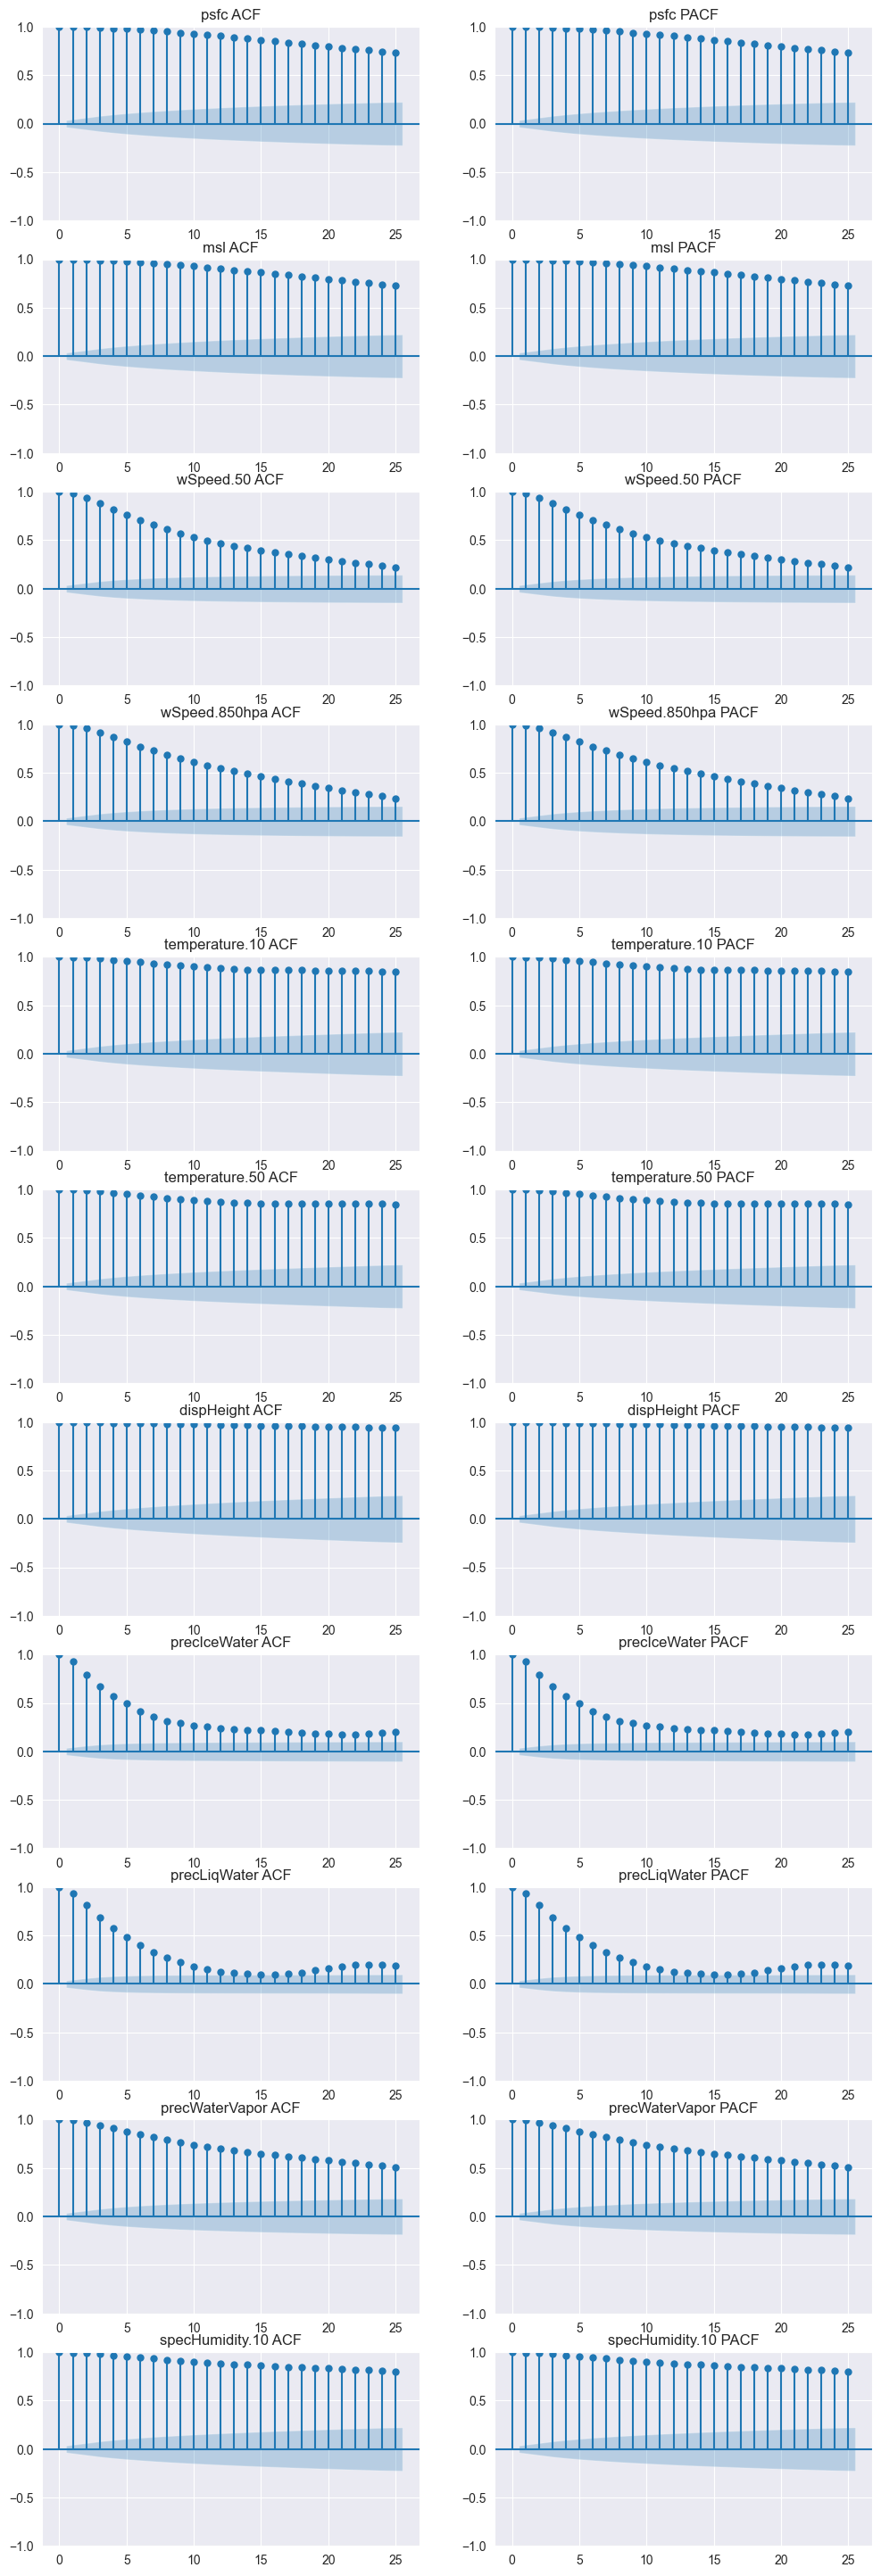

In [21]:
f, axs = plt.subplots(df.columns.size,2,figsize = (12,40/12*df.columns.size))
lags = 25
forecasterIter = iter(forecasters.keys())
for i in range(df.columns.size):
    forecast = next(forecasterIter)
    forecasters[forecast].plot_acf(ax=axs[i,0], title = f"{df.columns[i]} ACF", lags=lags)
    forecasters[forecast].plot_acf(ax=axs[i,1], title = f"{df.columns[i]} PACF", lags=lags)

In [26]:
critical_pval = 0.05
print('-'*100)
for i in forecasters:
    print('Conventional Augmented Dickey-Fuller results:')
    stat, pval, _, _, _, _ = forecasters[i].adf_test(full_res=True)
    print('the test-stat value is: {:.2f}'.format(stat))
    print('the p-value is {:.4f}'.format(pval))
    print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
    print('-'*100)

----------------------------------------------------------------------------------------------------
Conventional Augmented Dickey-Fuller results:
the test-stat value is: -4.71
the p-value is 0.0001
the series is stationary
----------------------------------------------------------------------------------------------------
Conventional Augmented Dickey-Fuller results:
the test-stat value is: -4.72
the p-value is 0.0001
the series is stationary
----------------------------------------------------------------------------------------------------
Conventional Augmented Dickey-Fuller results:
the test-stat value is: -9.50
the p-value is 0.0000
the series is stationary
----------------------------------------------------------------------------------------------------
Conventional Augmented Dickey-Fuller results:
the test-stat value is: -7.85
the p-value is 0.0000
the series is stationary
----------------------------------------------------------------------------------------------------
Con

In [28]:
for f in forecasters.values():
    f.generate_future_dates(12)
    f.set_test_length(.25)
    f.set_validation_length(6)
    f.add_seasonal_regressors('week',
                              'month',
                              raw=False,
                              sincos=True
                              )
    #f.add_seasonal_regressors()
    f.add_time_trend()
    f.add_cycle(8760)
    f.add_ar_terms(5)

In [ ]:
GridGenerator.get_example_grids(overwrite=False)
GridGenerator.get_mv_grids(overwrite=False)

for f in forecasters.values():
    f.tune_test_forecast (models, feature_importance = True)


In [29]:
for f in forecasters.values():
    f.tune_test_forecast(models,feature_importance=True)

In [30]:
for f in forecasters.values():
    f.set_estimator('combo')
    f.manual_forecast(how='weighted')

C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for gbt. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for rf. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for xgboost. To turn on confidence intervals for future evaluated models, call the eval_cis() met

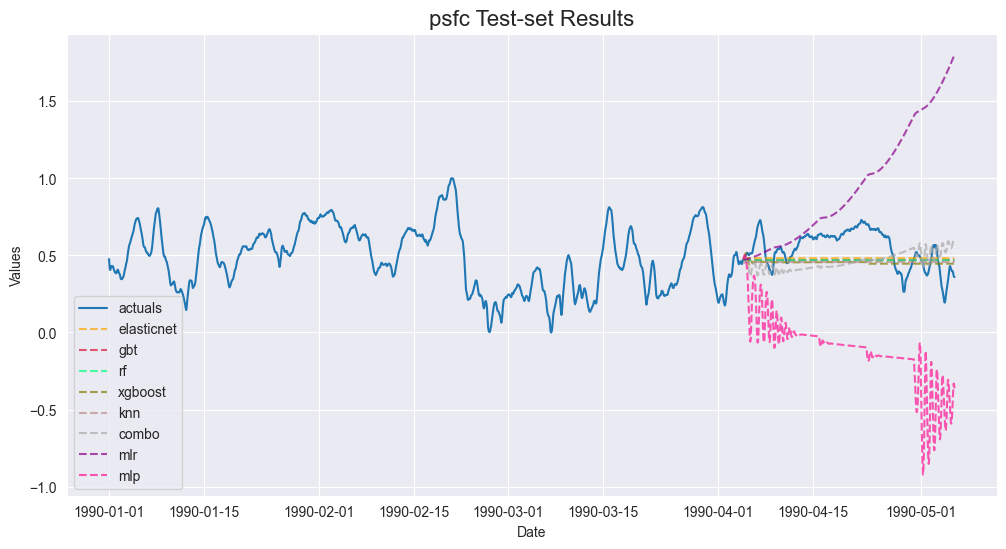

C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for rf. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for gbt. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.

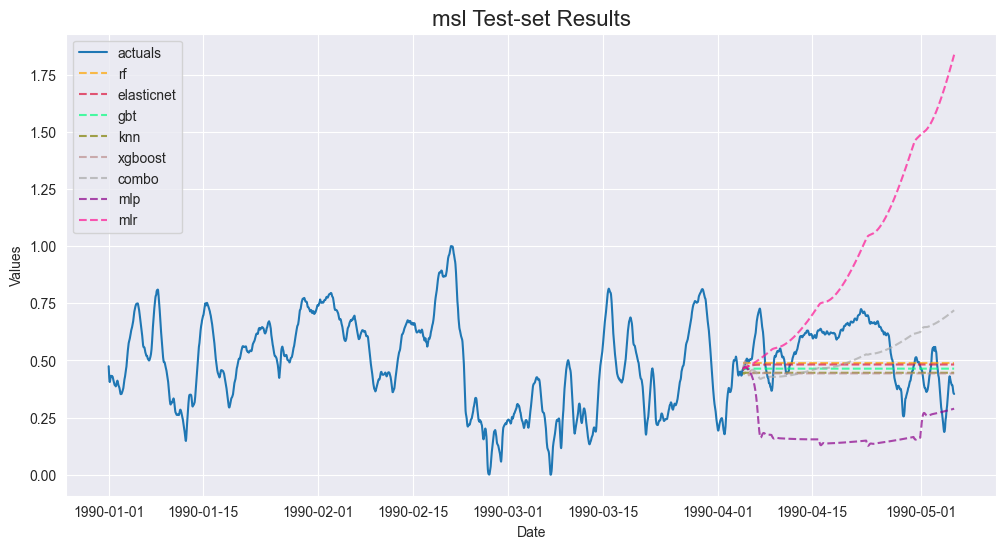

C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for combo. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for xgboost. To turn on confidence intervals for future evaluated models, call the eval_cis() 

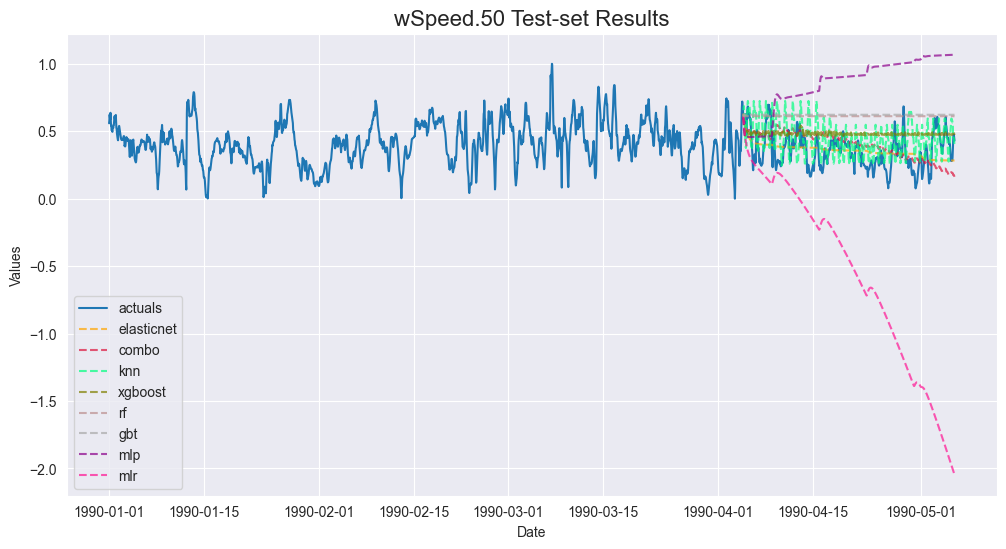

C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for gbt. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for xgboost. To turn on confidence intervals for future evaluated models, call the eval_cis() me

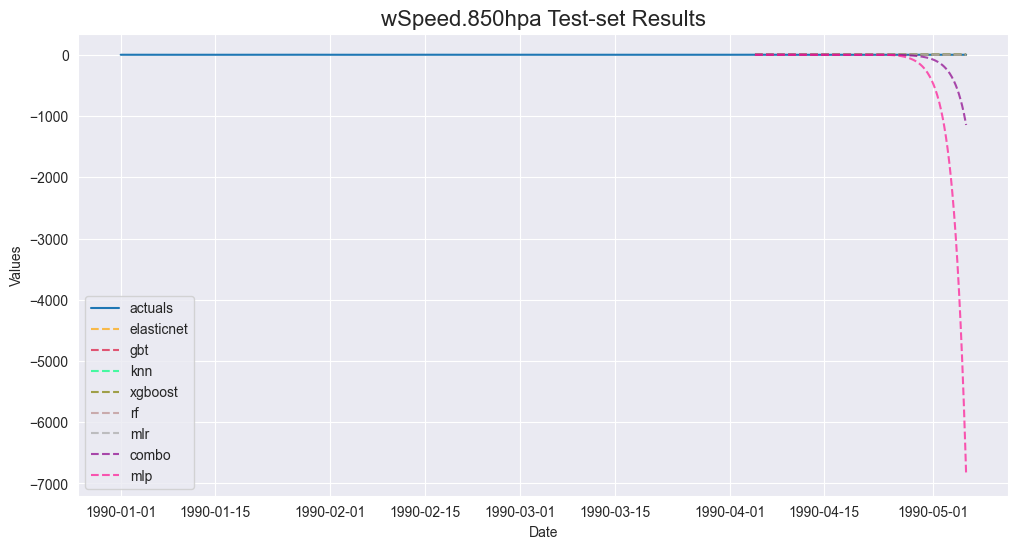

C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for combo. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for xgboost. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for gbt. To turn on confidence intervals for future evaluated models, call the eval_cis() 

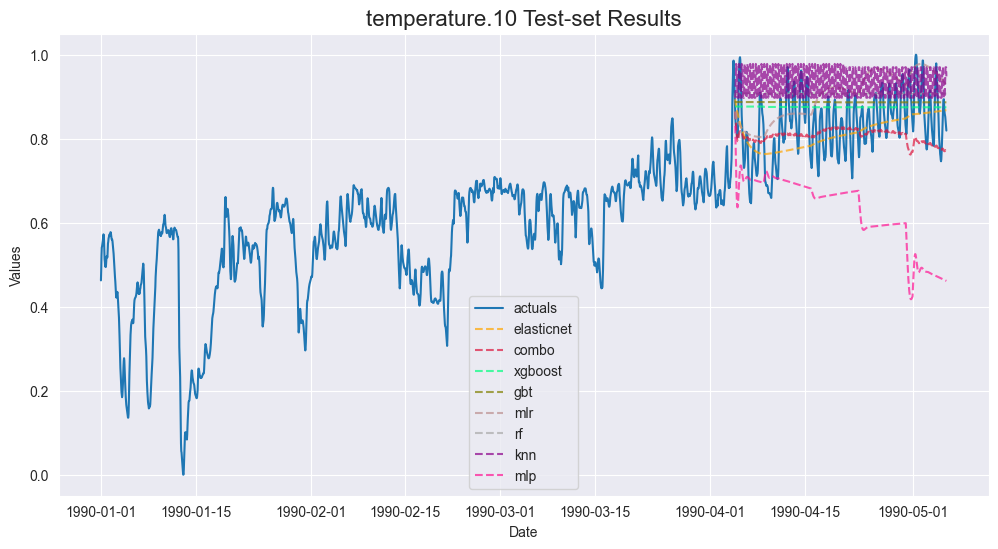

C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for xgboost. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for rf. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for gbt. To turn on confidence intervals for future evaluated models, call the eval_cis() met

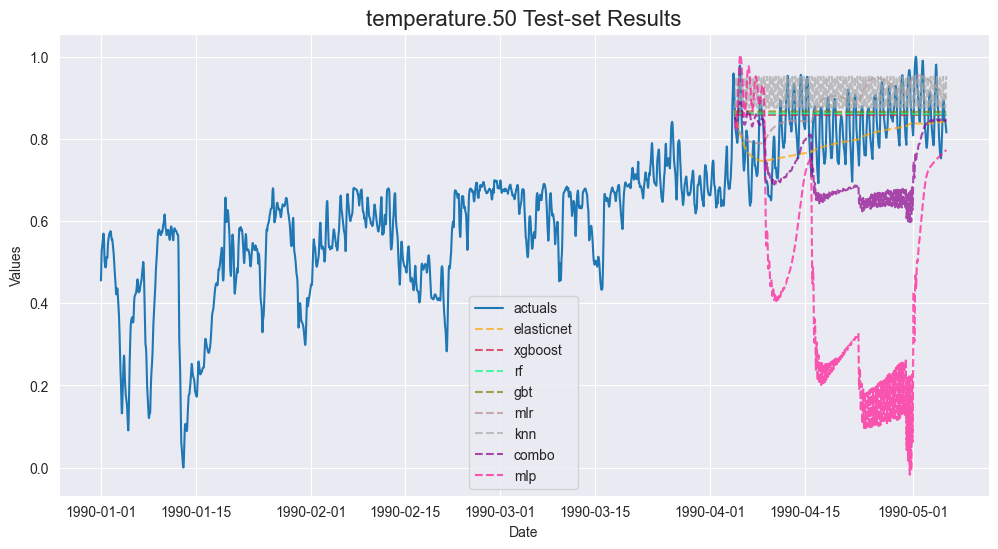

C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for rf. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for knn. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for gbt. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for xgboost. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  

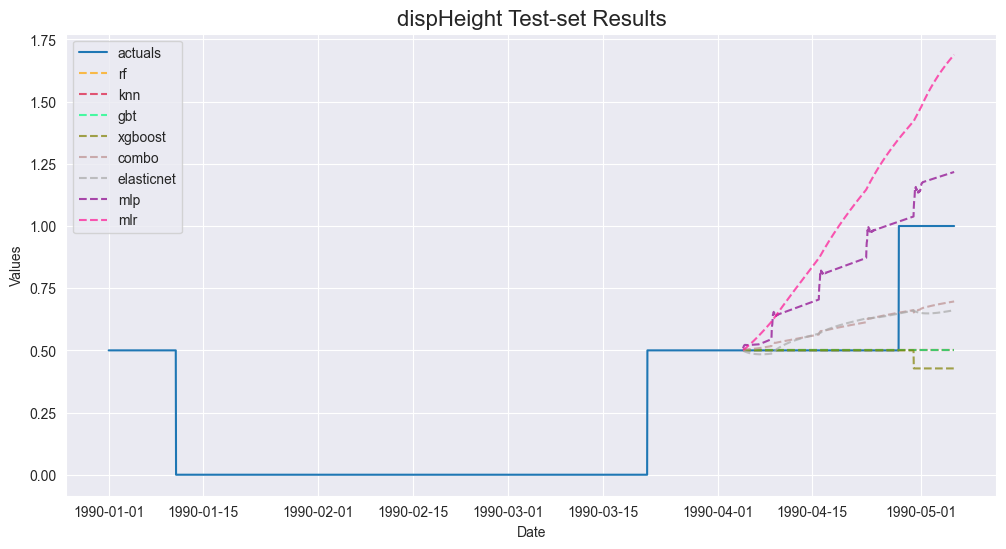

C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for combo. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for mlp. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for xgboost. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for gbt. To turn on confidence intervals for future evaluated models, call the eval_cis() method.

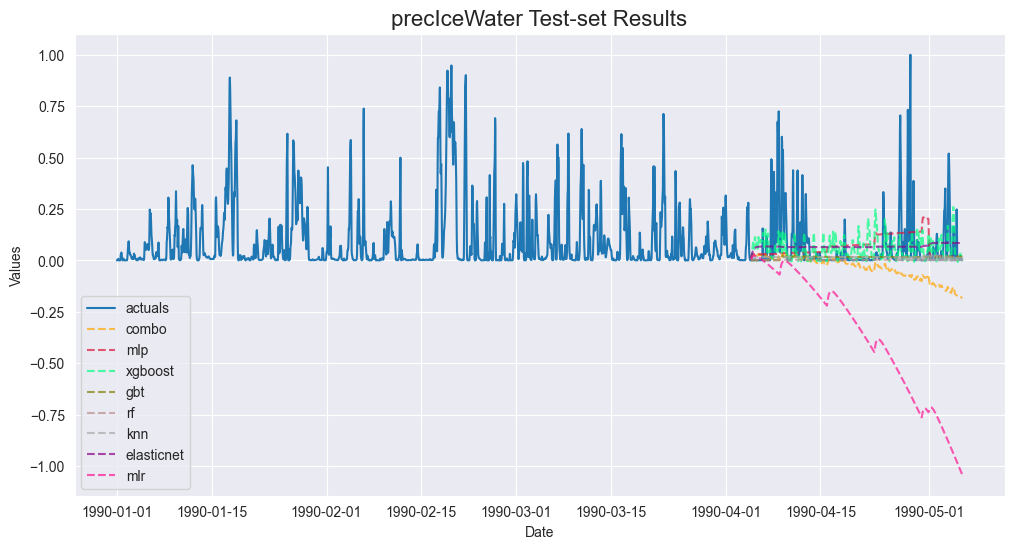

C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for combo. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for mlp. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for xgboost. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for gbt. To turn on confidence intervals for future evaluated models, call the eval_cis() method.

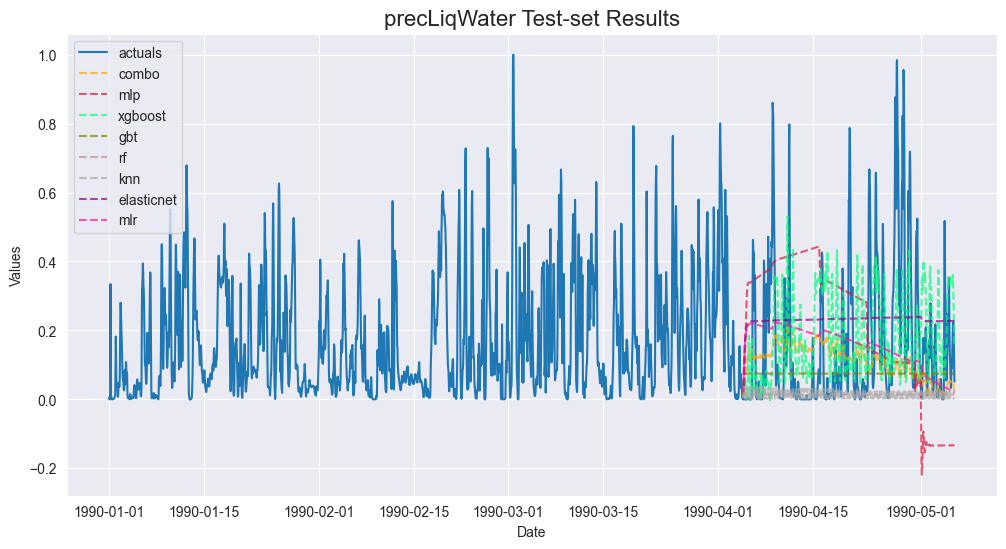

C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for xgboost. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for gbt. To turn on confidence intervals for future evaluated models, call the eval_cis() me

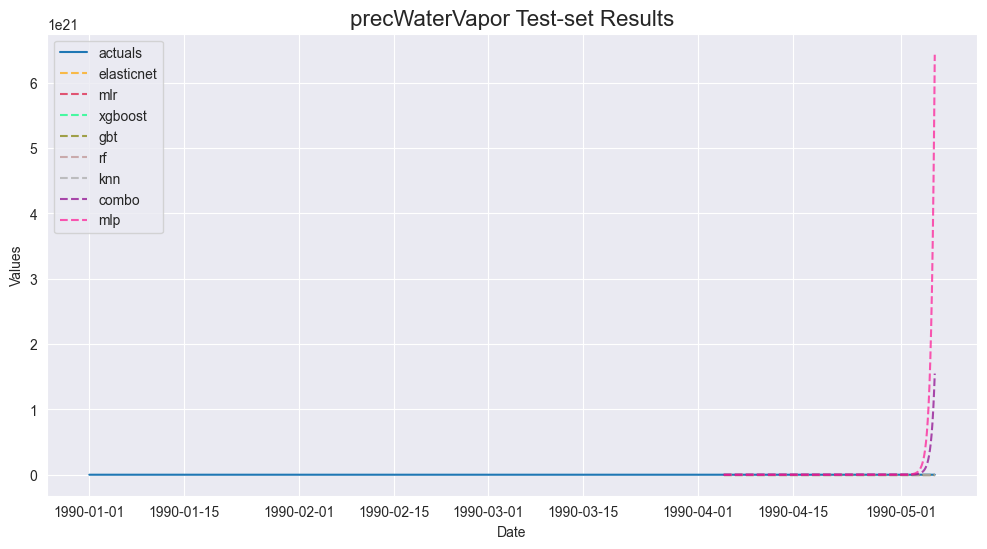

C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for elasticnet. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for combo. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for mlp. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\Forecaster.py:5632: Warning: Confidence intervals not found for xgboost. To turn on confidence intervals for future evaluated models, call the eval_cis() 

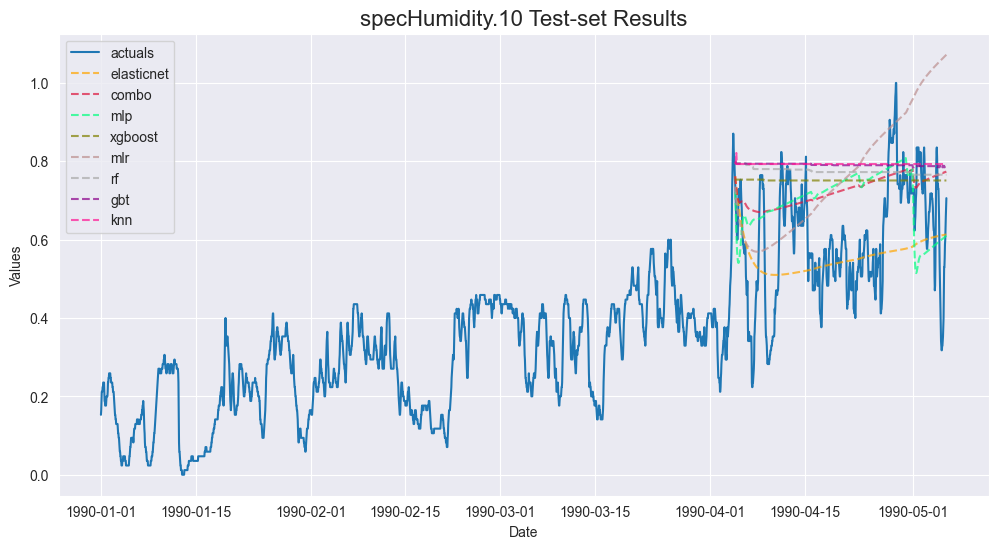

In [31]:
for f in forecasters.keys():
    forecasters[f].plot_test_set(ci=True,order_by='LevelTestSetMAPE')
    plt.title(f'{f} Test-set Results',size=16)
    plt.show()

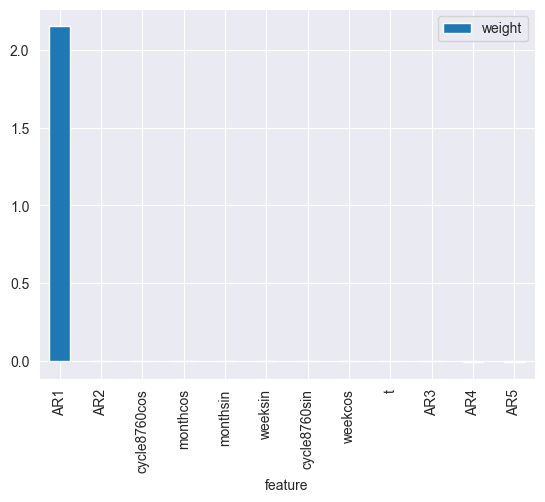

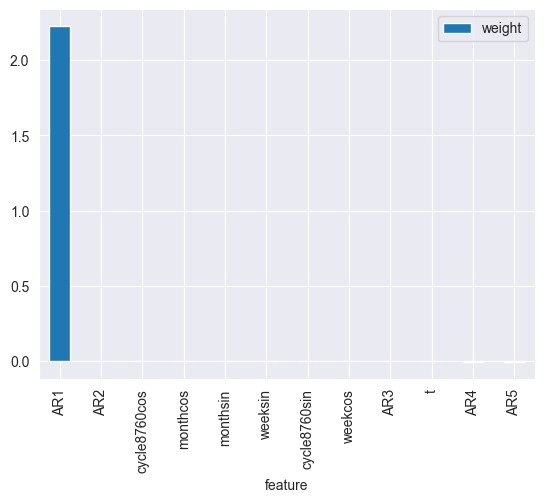

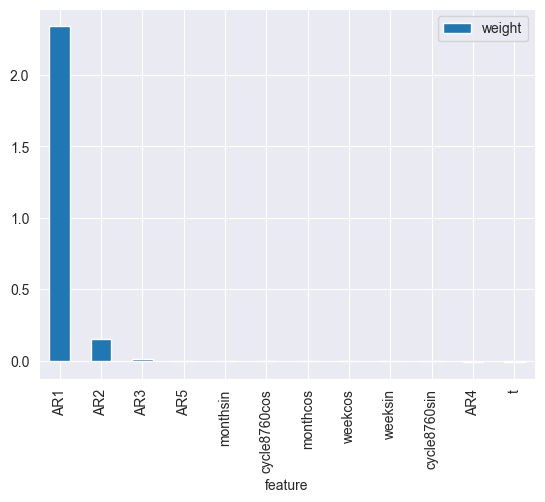

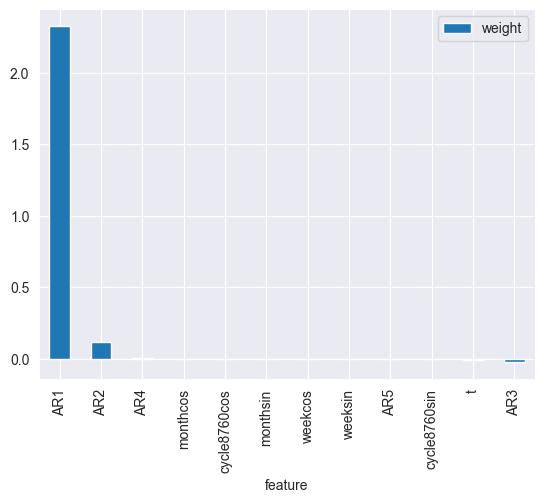

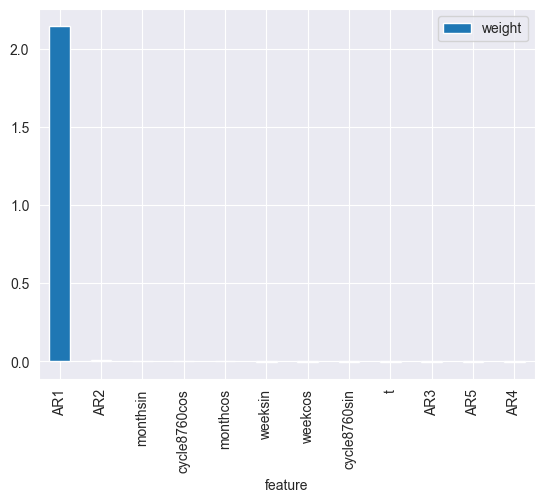

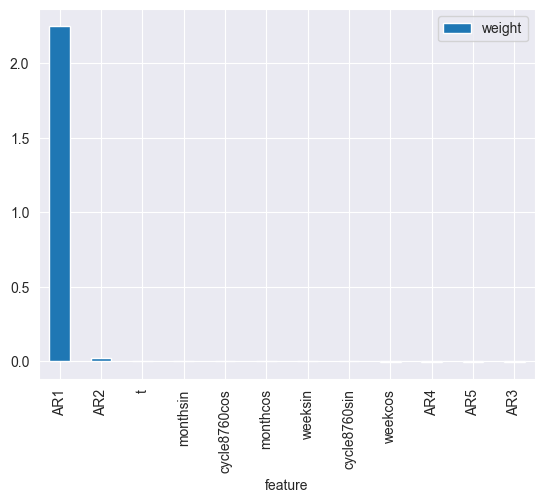

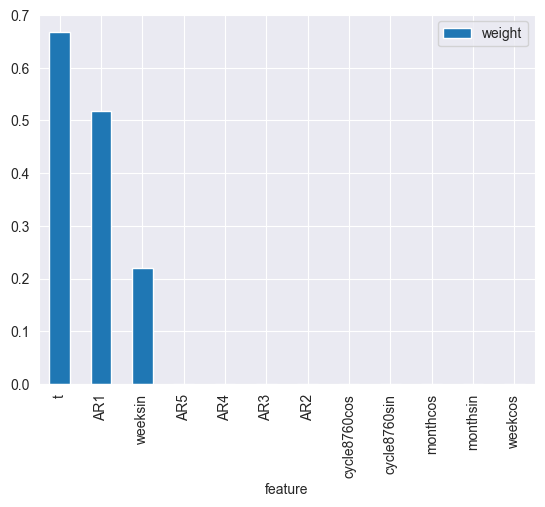

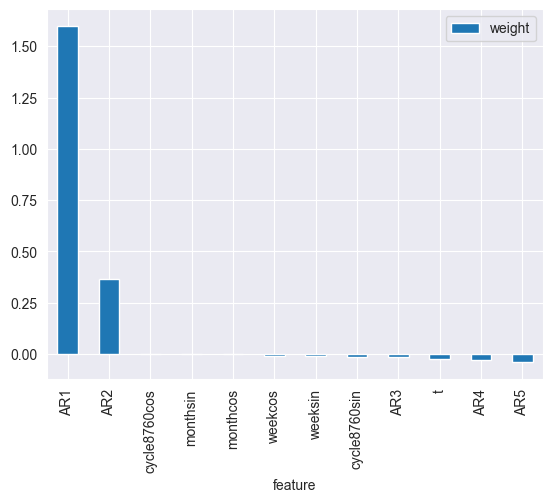

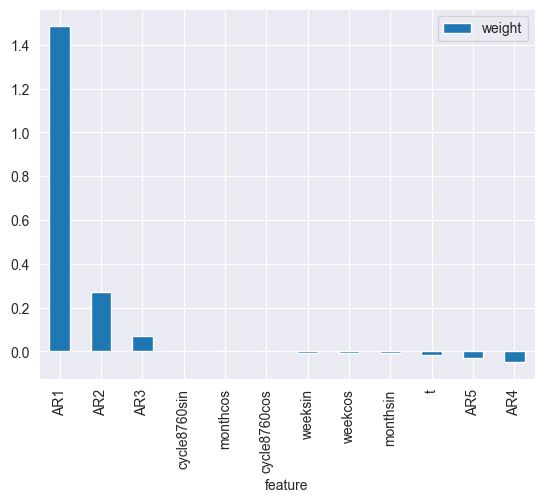

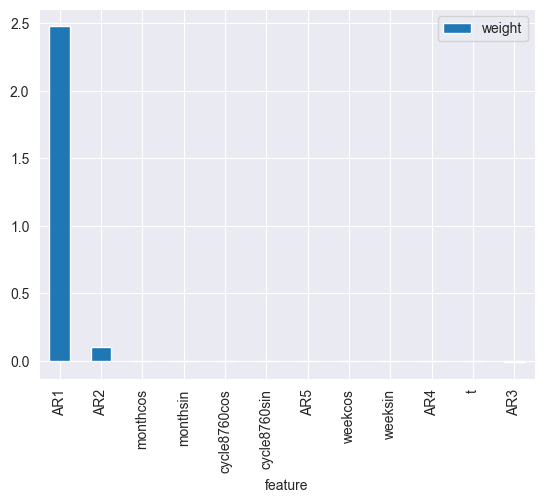

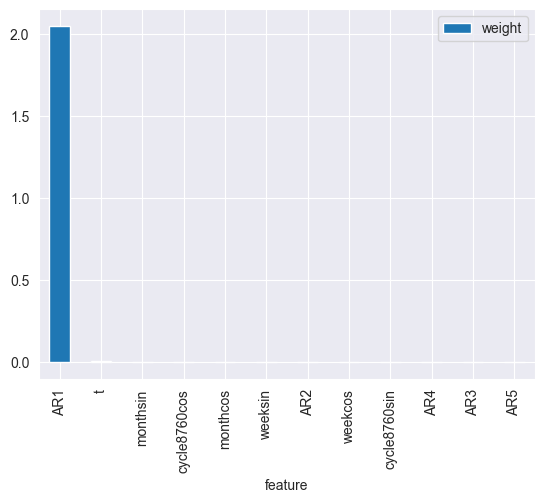

In [32]:
 for f in forecasters.values():
    f.export_feature_importance('xgboost').plot.bar(y='weight')
    plt.show()

In [33]:
pd.set_option('display.float_format',  '{:.4f}'.format)
ms = export_model_summaries(forecasters,determine_best_by='LevelTestSetMAPE')
ms[
    [
        'ModelNickname',
        'Series',
        'Integration',
        'LevelTestSetMAPE',
        'LevelTestSetR2',
        'InSampleMAPE',
        'InSampleR2',
        'best_model'
    ]
]

ModelNickname           Series  Integration  LevelTestSetMAPE  \
0     elasticnet             psfc            0            0.2222   
1            gbt             psfc            0            0.2277   
2             rf             psfc            0            0.2280   
3        xgboost             psfc            0            0.2327   
4            knn             psfc            0            0.2349   
..           ...              ...          ...               ...   
83       xgboost  specHumidity.10            0            0.3745   
84           mlr  specHumidity.10            0            0.4007   
85            rf  specHumidity.10            0            0.4121   
86           gbt  specHumidity.10            0            0.4362   
87           knn  specHumidity.10            0            0.4390   

    LevelTestSetR2  InSampleMAPE  InSampleR2  best_model  
0          -0.2708           NaN      0.9037        True  
1          -0.3905           NaN      0.9992       False  
2          -0.3954           NaN      0.9980       False  
3          -0.5570           NaN      0.9999       False  
4          -0.5371           NaN      0.9943       False  
..             ...           ...         ...         ...  
83         -1.1125           NaN      0.9986       False  
84         -1.7673           NaN      0.9950       False  
85         -1.4986           NaN      0.9853       False  
86         -1.7600           NaN      0.9825       False  
87         -1.7918           NaN      0.9933       False  

[88 rows x 8 columns]

In [46]:

print()

mvf = MVForecaster(*forecasters.values(),names=forecasters.keys())
mvf.set_test_length(.2)
mvf.set_validation_length(4)

<AxesSubplot: >

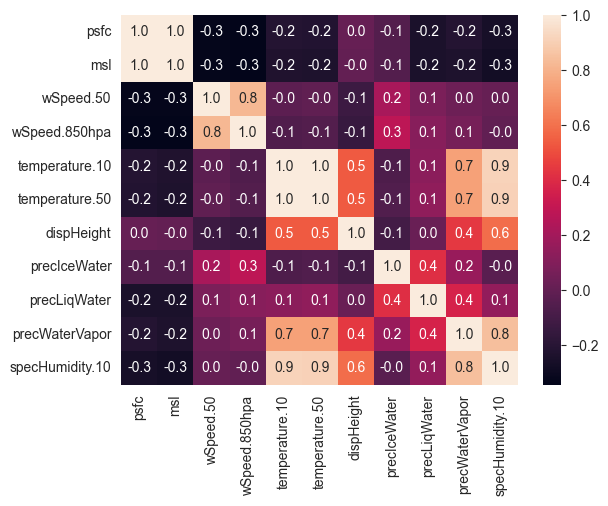

In [50]:
sns.heatmap(mvf.corr(),annot=True,fmt='.1f')

C:\Users\admin\anaconda3\envs\WindDataPreparation\lib\site-packages\scalecast\MVForecaster.py:2322: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots()


KeyboardInterrupt: 

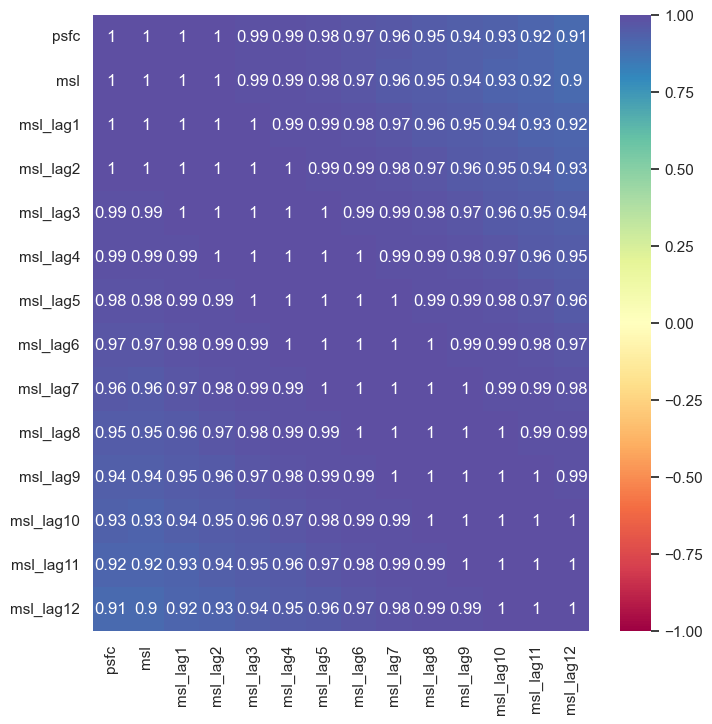

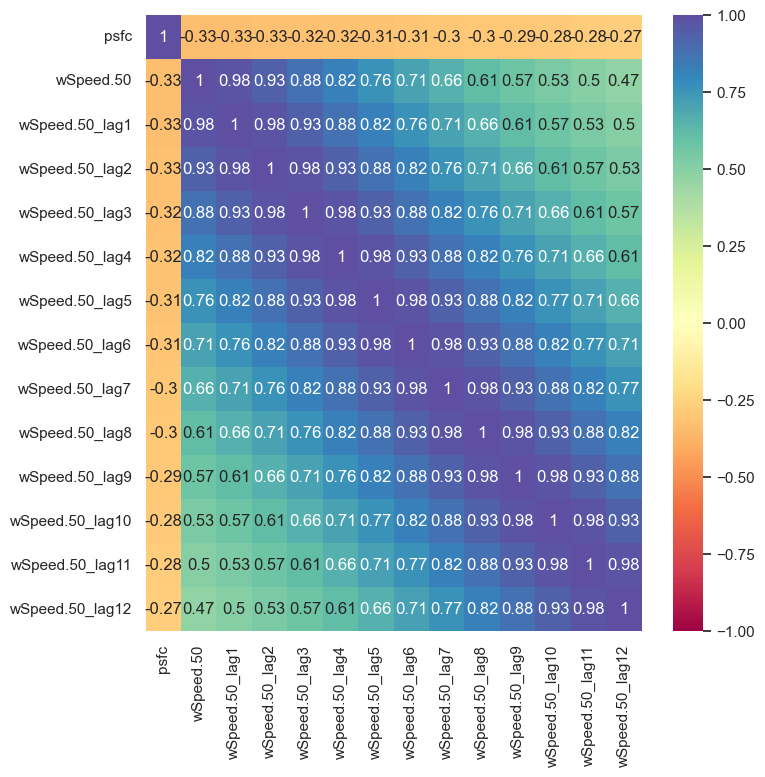

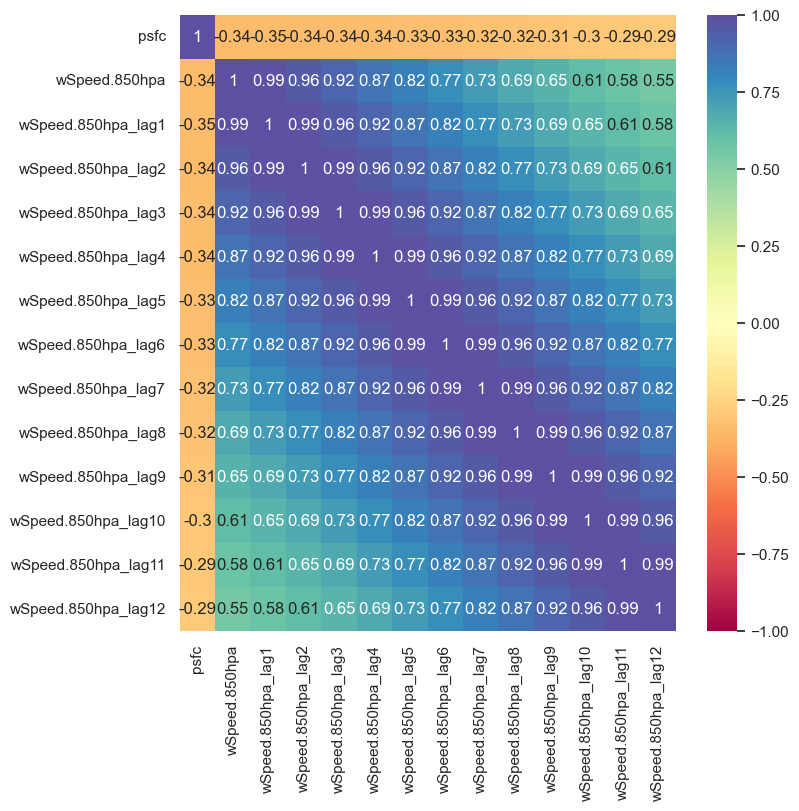

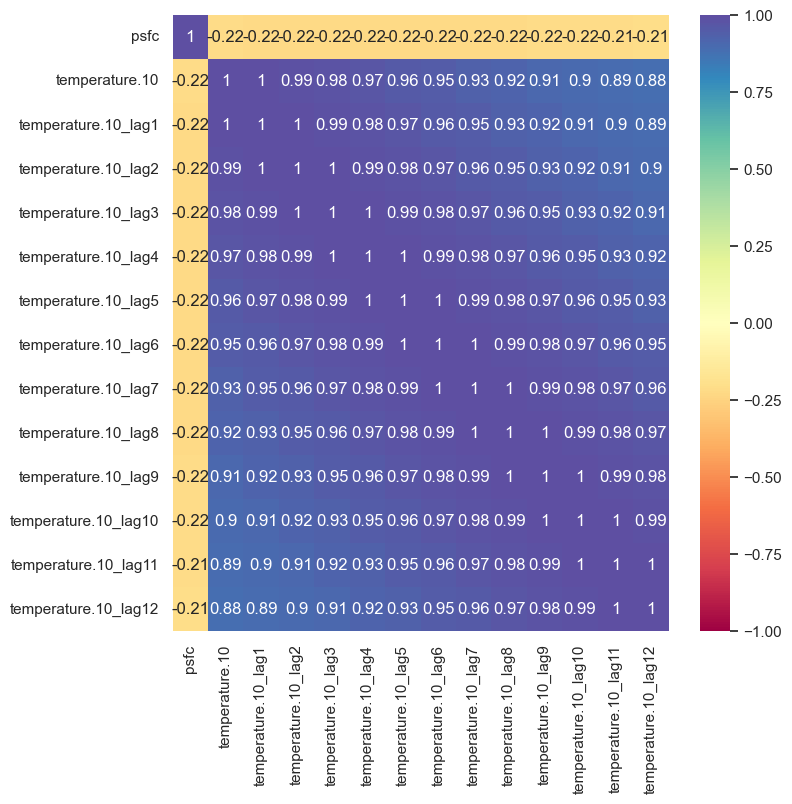

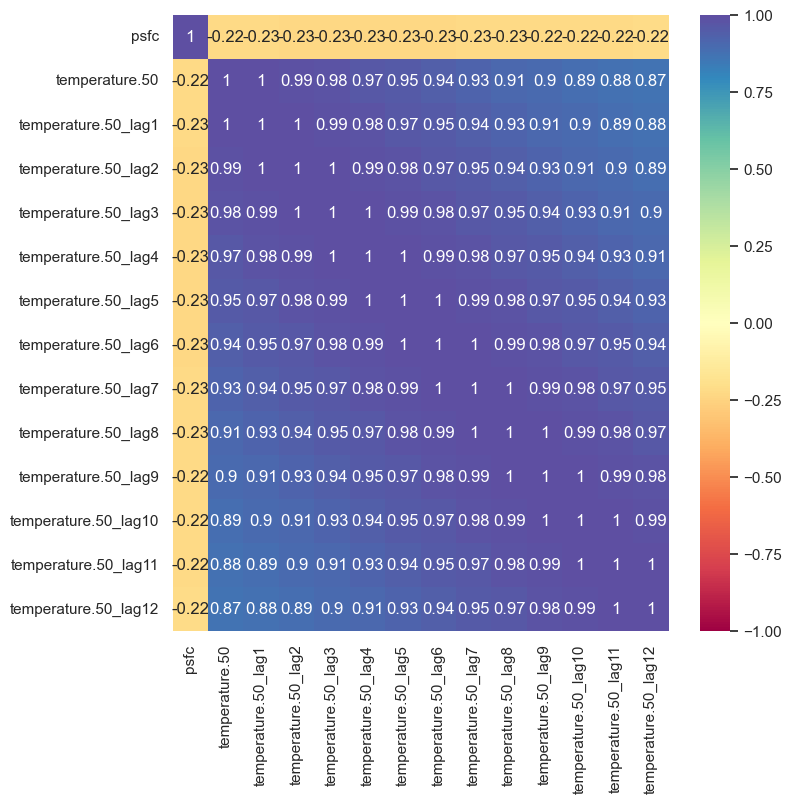

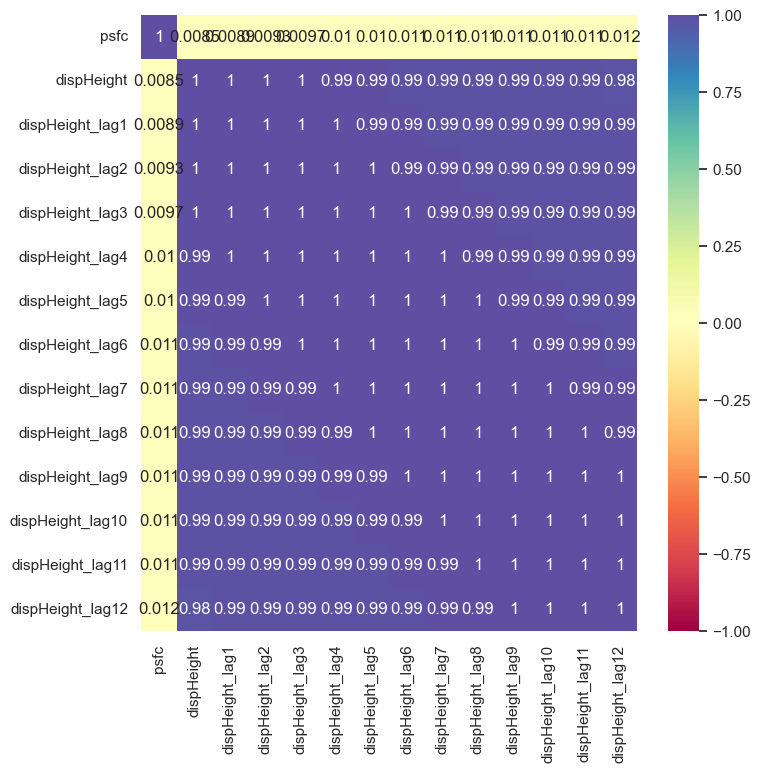

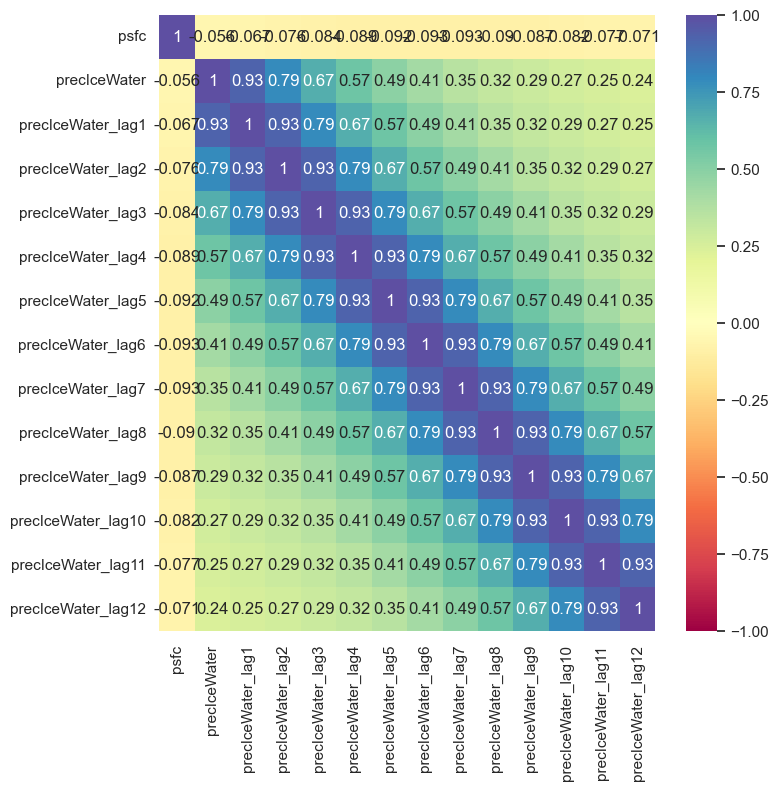

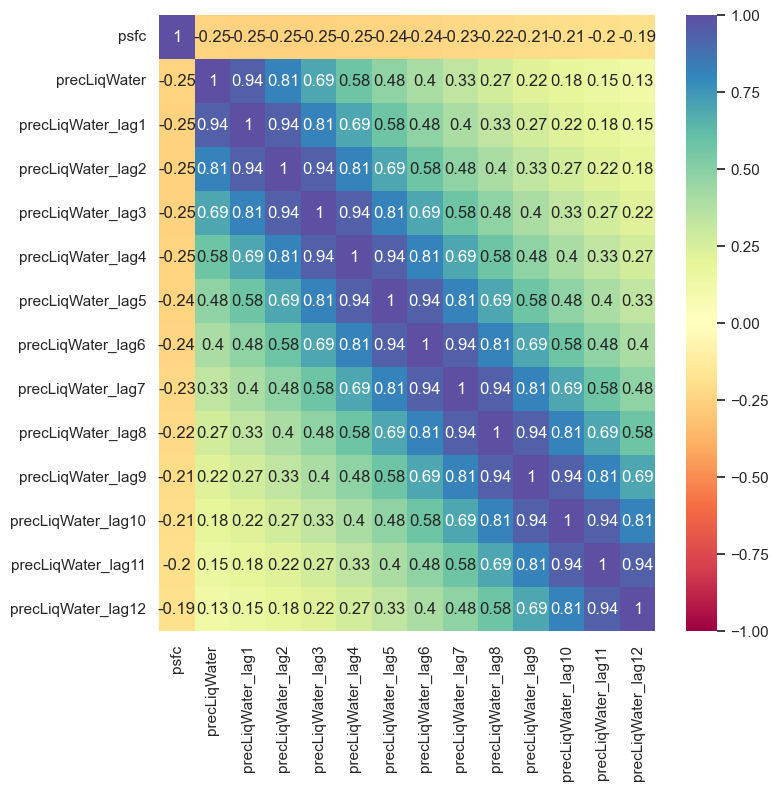

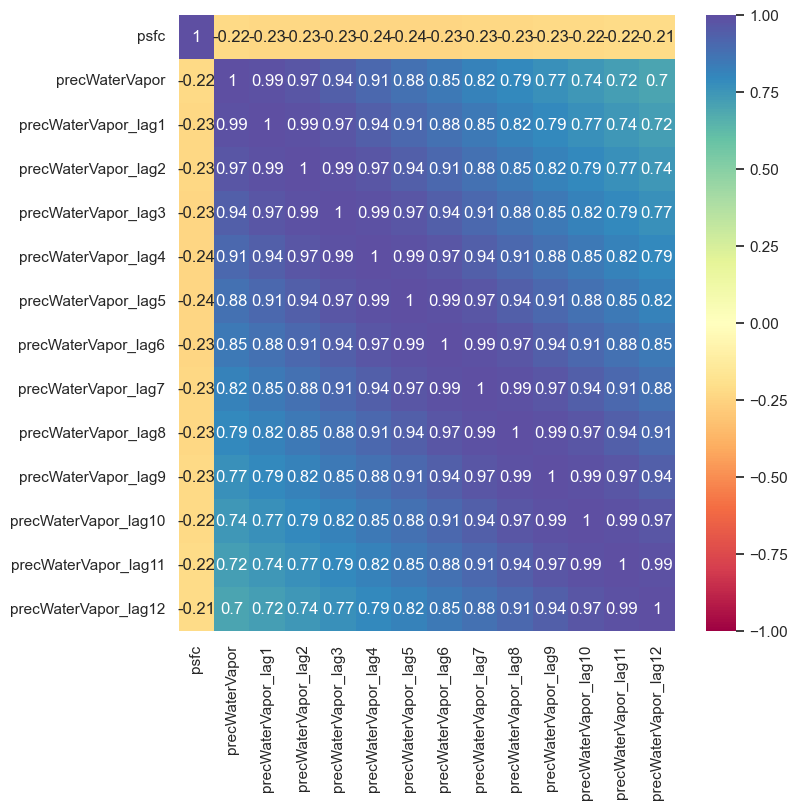

Error in callback <function flush_figures at 0x0000025AD52227A0> (for post_execute):



KeyboardInterrupt



In [55]:
sns.set(rc={'figure.figsize':(8,8)})
for i in forecasters.keys():
    for j in forecasters.keys():
        if(i != j):
            mvf.corr_lags(
                y=i,
                x=j,
                lags=12,
                disp='heatmap',
                annot=True,
                vmin=-1,
                vmax=1,
                cmap = 'Spectral',
            )
            plt.savefig(f'fig/Correlation{i}-{j}.png')